In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score

import joblib

In [2]:
data=pd.read_csv('train_loan_data.csv')

In [3]:
print('DataSet : There are {} records with {} features in train data set'.format(data.shape[0],data.shape[1]))

DataSet : There are 80000 records with 28 features in train data set


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [5]:
data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [6]:
data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [7]:
display(data.head(2))

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid


In [8]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [14]:
data.duplicated().sum()

0

In [15]:
data.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [16]:
cat_col = data.drop(columns = 'loan_status').select_dtypes(include = object).columns
num_col = data.drop(columns = 'loan_status').select_dtypes(include = np.number).columns
print("No of categorical column : {} \n No of numerical column : {}".format(cat_col.shape[0],num_col.shape[0]))

No of categorical column : 13 
 No of numerical column : 14


In [17]:
print([(i,data[i].nunique(),data[i].unique()) for i in cat_col if data[i].nunique() <60])

[('addr_state', 51, array(['CO', 'CA', 'FL', 'IL', 'MD', 'NY', 'PA', 'WI', 'UT', 'TX', 'AL',
       'KS', 'AR', 'AZ', 'MI', 'MN', 'LA', 'HI', 'NC', 'VT', 'OK', 'KY',
       'ME', 'CT', 'AK', 'NJ', 'IN', 'GA', 'MA', 'OR', 'NM', 'VA', 'TN',
       'SC', 'NV', 'WY', 'WA', 'WV', 'MO', 'OH', 'MS', 'DC', 'NE', 'ID',
       'NH', 'RI', 'SD', 'MT', 'DE', 'ND', 'IA'], dtype=object)), ('emp_length', 11, array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)), ('grade', 7, array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)), ('home_ownership', 6, array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)), ('application_type', 2, array(['Individual', 'Joint App'], dtype=object)), ('initial_list_status', 2, array(['w', 'f'], dtype=object)), ('purpose', 14, array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'small_business', 'medical', 'major_p

In [18]:
print([(i,data[i].nunique()) for i in cat_col if data[i].nunique() > 60])

[('earliest_cr_line', 640), ('emp_title', 36661), ('title', 5349)]


In [19]:
cat_col = data.drop(columns = ['loan_status','earliest_cr_line','emp_title','title']).select_dtypes(include = object).columns
num_col = data.drop(columns = 'loan_status').select_dtypes(include = np.number).columns

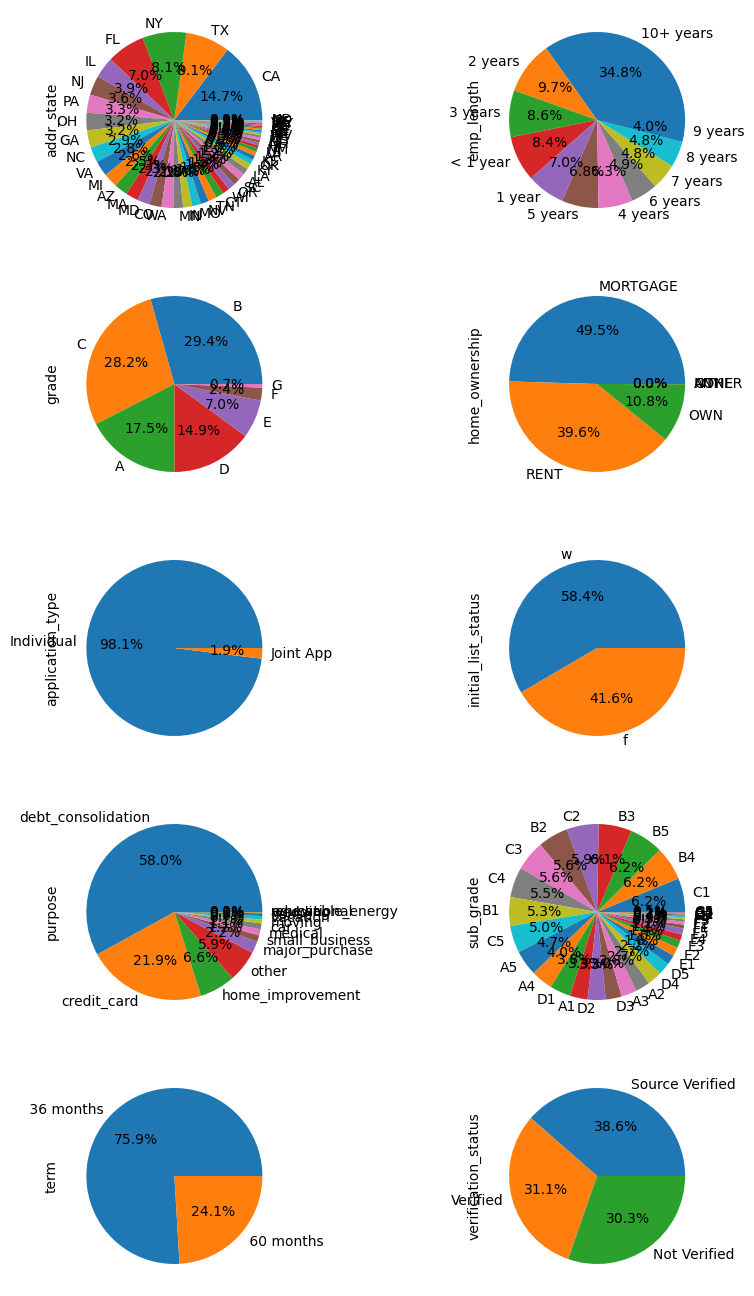

In [25]:
ite = 1
plt.figure(figsize=(10,20))

for i in cat_col:
    plt.subplot(6,2,ite)
    data[i].value_counts().plot.pie(autopct = '%1.1f%%')
    ite +=1

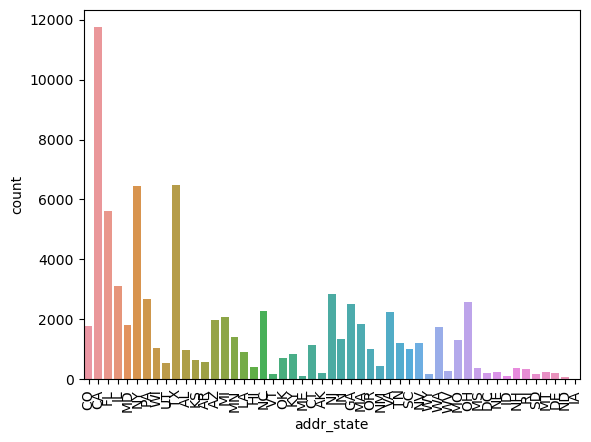

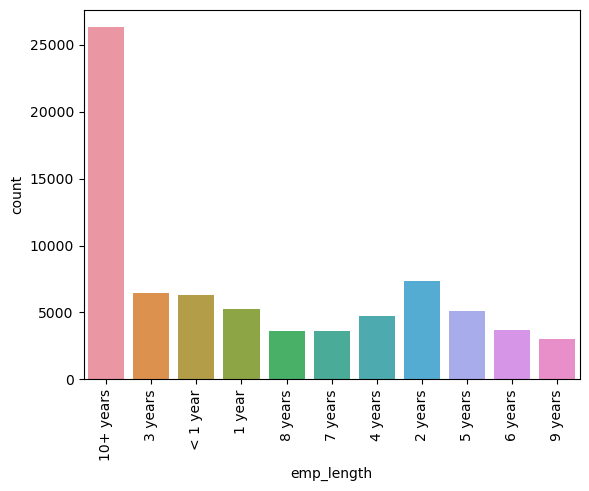

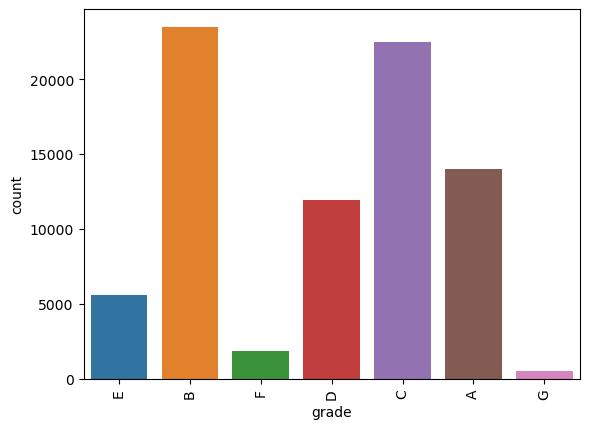

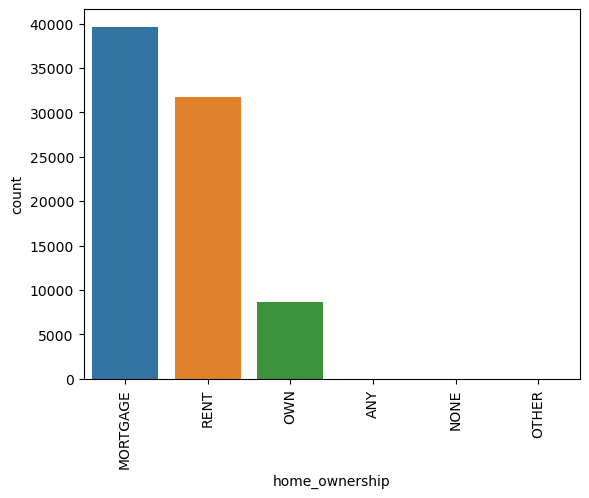

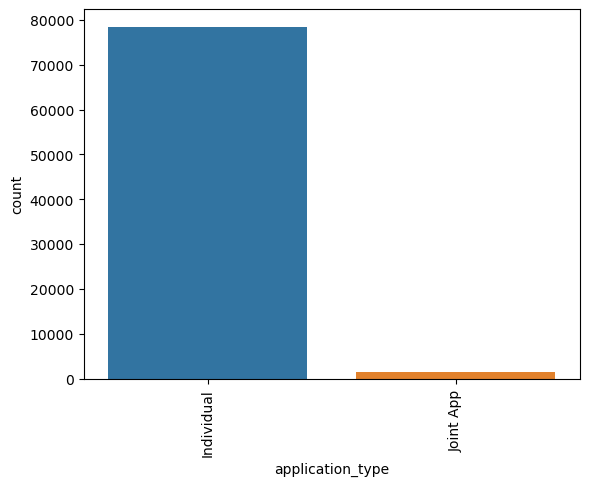

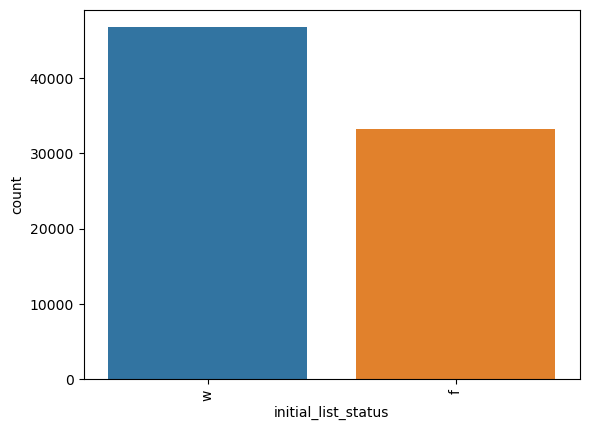

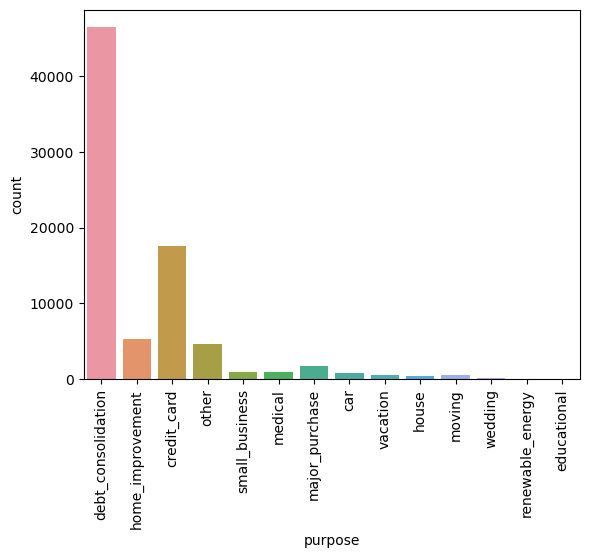

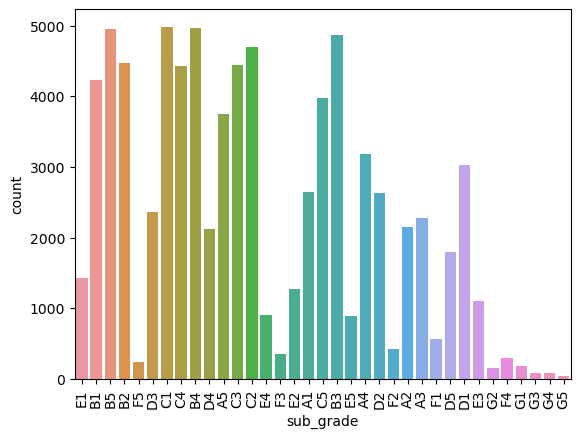

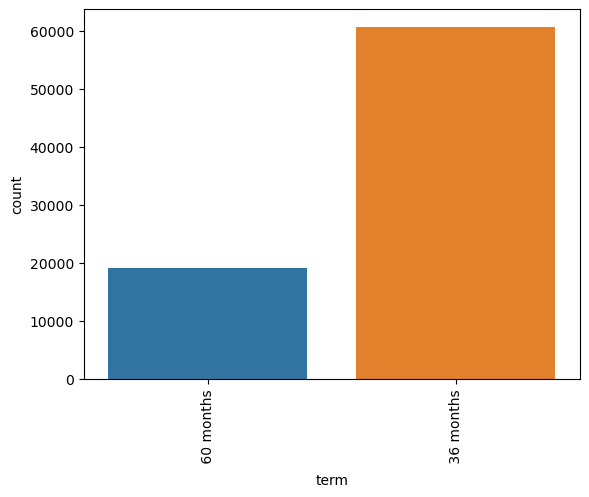

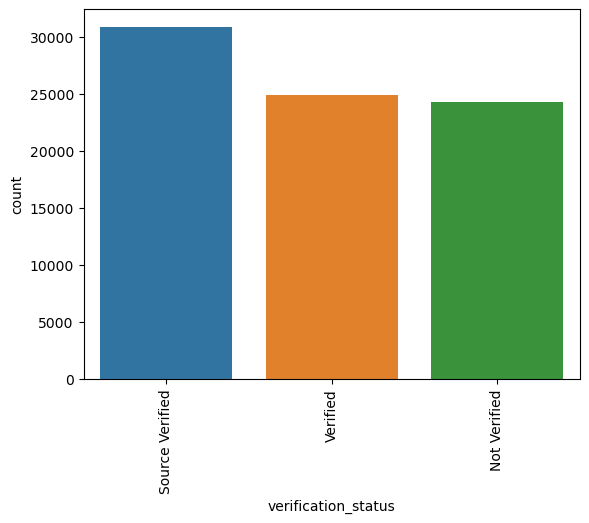

In [26]:
for i in cat_col:
    a= sns.countplot(x=data[i])
    plt.setp(a.get_xticklabels(),rotation = 90)
    plt.show()


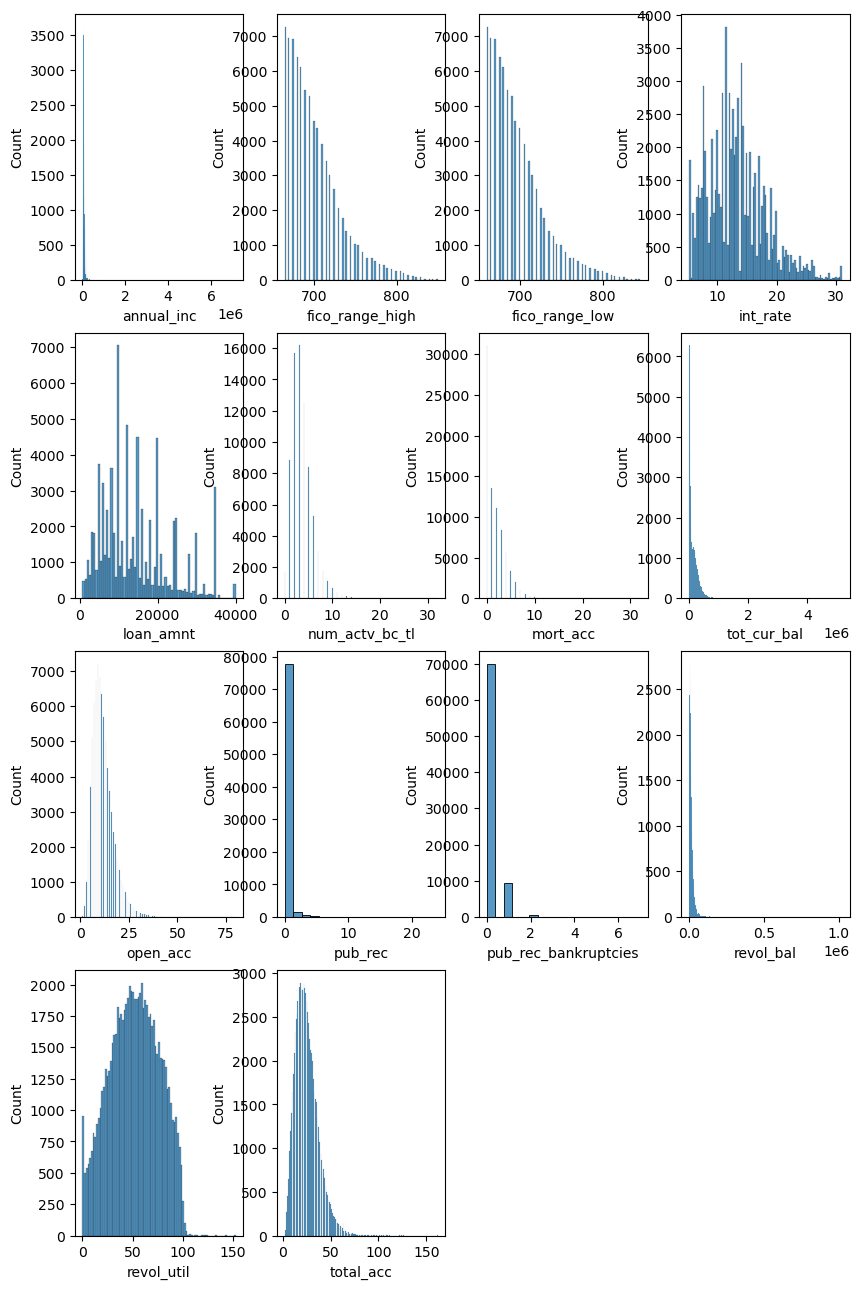

In [28]:
plt.figure(figsize=(10,20))
ite=1
for i in num_col:
    plt.subplot(5,4,ite)
    sns.histplot(x= data[i])
    ite+=1

In [29]:
data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11680\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
annual_inc,1.000000,0.064655,0.064655,-0.069414,0.319863,0.106228,0.218601,0.430759,0.134215,-0.008990,-0.045238,0.310651,0.044752,0.170555
fico_range_high,0.064655,1.000000,1.000000,-0.402389,0.099921,-0.108283,0.092303,0.135284,0.014905,-0.204863,-0.204737,0.023540,-0.453448,0.013385
fico_range_low,0.064655,1.000000,1.000000,-0.402393,0.099921,-0.108283,0.092303,0.135286,0.014905,-0.204866,-0.204740,0.023543,-0.453448,0.013385
int_rate,-0.069414,-0.402389,-0.402393,1.000000,0.144910,0.019435,-0.078283,-0.087000,-0.004795,0.055351,0.060317,-0.028978,0.239496,-0.040937
loan_amnt,0.319863,0.099921,0.099921,0.144910,1.000000,0.197615,0.226006,0.310725,0.183501,-0.062819,-0.088613,0.319811,0.104931,0.204682
num_actv_bc_tl,0.106228,-0.108283,-0.108283,0.019435,0.197615,1.000000,0.031868,0.097332,0.544174,-0.035742,-0.060311,0.299474,0.103162,0.292003
mort_acc,0.218601,0.092303,0.092303,-0.078283,0.226006,0.031868,1.000000,0.530393,0.113992,-0.007052,0.006431,0.209552,0.030738,0.362553
tot_cur_bal,0.430759,0.135284,0.135286,-0.087000,0.310725,0.097332,0.530393,1.000000,0.238560,-0.073238,-0.098221,0.456139,0.084849,0.299713
open_acc,0.134215,0.014905,0.014905,-0.004795,0.183501,0.544174,0.113992,0.238560,1.000000,-0.010347,-0.013418,0.220704,-0.144939,0.700375
pub_rec,-0.008990,-0.204863,-0.204866,0.055351,-0.062819,-0.035742,-0.007052,-0.073238,-0.010347,1.000000,0.685052,-0.093533,-0.072720,0.018624


C:\Users\Admin\AppData\Local\Temp\ipykernel_11680\3772768352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

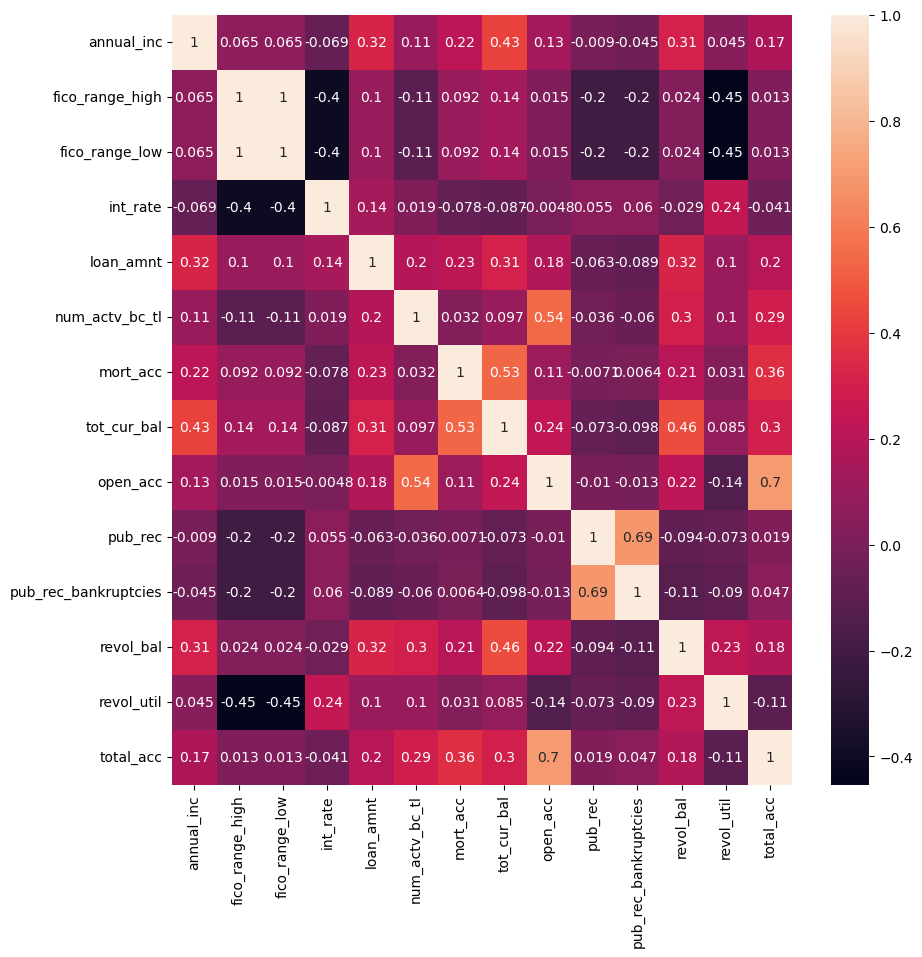

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [34]:
categorical_preprocessing = Pipeline([
    ('categorical imputation',SimpleImputer(strategy='most_frequent')),
    ('categorical encoding', OneHotEncoder(sparse= False, handle_unknown='ignore'))
])

In [33]:
numerical_preprocessing = Pipeline([
    ('numerical imputation',SimpleImputer(strategy='mean')),
    ('numerical scaling', MinMaxScaler())
])

In [35]:
Final_preprocessing = ColumnTransformer(
    transformers = [
    ('category',categorical_preprocessing,cat_col),
    ('numerical',numerical_preprocessing,num_col)
])

In [36]:
Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('polynomal',PolynomialFeatures(degree=2)),
    ('model',LogisticRegression())
])

In [37]:
data.drop(columns = ['earliest_cr_line','emp_title','title'],inplace = True)

In [38]:
data_x = data.drop(columns = 'loan_status')
data_y = data['loan_status']

In [39]:
data.shape

(80000, 25)

In [41]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.2,random_state=50)


In [42]:
Package.fit(train_x,train_y)

D:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('categorical '
                                                                   'imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical '
                                                                   'encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['addr_state', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose',...
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('numerical '
                                                                   'scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object'))])),
                ('polynomal', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [43]:
res = []
for i in range(1,50):
    Package = Pipeline([
    ('preprocessing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree=2)),
    ('model',KNeighborsClassifier(n_neighbors=i))
 ])   
    Package.fit(train_rus_x,train_rus_y)
    train_predict_y = Package.predict(train_rus_x)
    res.append(accuracy_score(train_rus_y,train_predict_y))

NameError: name 'train_rus_x' is not defined

In [44]:
pd.Series(res,range(1,50)).plot()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11680\432492399.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(res,range(1,50)).plot()


ValueError: Length of values (0) does not match length of index (49)